In [7]:
sys.executable

'/usr/local/Cellar/jupyterlab/2.2.8/libexec/bin/python3.8'

In [1]:
# face color analysis given eye center position

import sys
import os
import numpy as np
import cv2
import argparse
import time
from mtcnn.mtcnn import MTCNN 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")



Dominant Eye Color:  Brown

 **Eyes Color Percentage **
Blue :  0.0 %
Blue Gray :  0.0 %
Brown :  1.85 %
Brown Gray :  0.0 %
Brown Black :  0.0 %
Green :  0.0 %
Green Gray :  0.0 %
Other :  98.15 %


-1

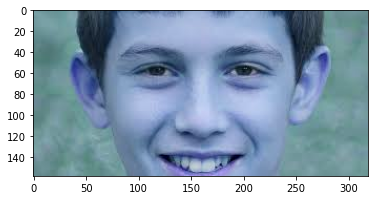

In [8]:
 # Бибиотека находит лица на изображении

detector = MTCNN()  # Кладем распозновалку в перевенную detector

# parser - вычленение аргументов коммандной строки
# default - по умолчанию

# define HSV color ranges for eyes colors
class_name = ("Blue", "Blue Gray", "Brown", "Brown Gray", "Brown Black", "Green", "Green Gray", "Other")
# выделяем  классификаторы, в общем, я ошиблась. Мы выделили не классификаторы, а кортеж
EyeColor = {
    class_name[0]: ((166, 21, 50), (240, 100, 85)),
    class_name[1]: ((166, 2, 25), (300, 20, 75)),
    class_name[2]: ((2, 20, 20), (40, 100, 60)),
    class_name[3]: ((20, 3, 30), (65, 60, 60)),
    class_name[4]: ((0, 10, 5), (40, 40, 25)),
    class_name[5]: ((60, 21, 50), (165, 100, 85)),
    class_name[6]: ((60, 2, 25), (165, 20, 65))
}
# определяем подходящий диапозон для классификаторов

def check_color(hsv, color):
    if (hsv[0] >= color[0][0]) and (hsv[0] <= color[1][0]) and (hsv[1] >= color[0][1]) and \
            hsv[1] <= color[1][1] and (hsv[2] >= color[0][2]) and (hsv[2] <= color[1][2]):
        return True
    else:
        return False


# define eye color category rules in HSV space
def find_class(hsv):
    color_id = 7
    for i in range(len(class_name) - 1):
        if check_color(hsv, EyeColor[class_name[i]]) == True:
            color_id = i

    return color_id

# далее уже идет сама нейронка
def eye_color(image):
    imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # загружаем изображение в формате hsv
    h, w = image.shape[0:2]  # присваиваем значение переменных высоты и ширины
    imgMask = np.zeros((image.shape[0], image.shape[1], 1))

    result = detector.detect_faces(image)  # находим лица на изображении и кладем их в массив
    if result == []:
        print('Warning: Can not detect any face in the input image!')  # Если массив оказывается пустым зарешаем скрипт
        return

    bounding_box = result[0]['box']  # Выделяем прямоугольную область в которой находится лицо
    left_eye = result[0]['keypoints']['left_eye']   # Выделяем левый глаз
    right_eye = result[0]['keypoints']['right_eye']  # Выделяем правый глаз

    eye_distance = np.linalg.norm(np.array(left_eye) - np.array(right_eye))  # находим расстояние между глазами
    eye_radius = eye_distance / 15  # approximate (приблизительный радиус глаза)

    cv2.circle(imgMask, left_eye, int(eye_radius), (255, 255, 255), -1)  # рисуем кружок на левом глазу
    cv2.circle(imgMask, right_eye, int(eye_radius), (255, 255, 255), -1)

    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (255, 155, 255),  # обводим лицо в зеленую прямоугольную рамку
                  2)

    cv2.circle(image, left_eye, int(eye_radius), (0, 155, 255), 1)  # рисуем кружок какого то другого цвета на левом глазу
    cv2.circle(image, right_eye, int(eye_radius), (0, 155, 255), 1)

    eye_class = np.zeros(len(class_name), np.float)

    for y in range(0, h):
        for x in range(0, w):
            if imgMask[y, x] != 0:
                eye_class[find_class(imgHSV[y, x])] += 1

    main_color_index = np.argmax(eye_class[:len(eye_class) - 1])
    total_vote = eye_class.sum()  # окончательно опредеяем цвет глаз

    print("\n\nDominant Eye Color: ", class_name[main_color_index])
    print("\n **Eyes Color Percentage **")  # выводим результат на экран
    for i in range(len(class_name)):
        print(class_name[i], ": ", round(eye_class[i] / total_vote * 100, 2), "%")

    label = 'Dominant Eye Color: %s' % class_name[main_color_index]  # выводим доминантный цвет на экран
    cv2.putText(image, label, (left_eye[0] - 10, left_eye[1] - 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (155, 255, 0))
#     cv2.imshow('EYE-COLOR-DETECTION', image)   # накладываем текст на картинку (при желании)



input_path = 'brown.jpeg'
image = cv2.imread(input_path, cv2.IMREAD_COLOR)
plt.imshow(image)
# detect color percentage
eye_color(image)
cv2.imwrite('result.jpg', image)
cv2.waitKey(0)

   

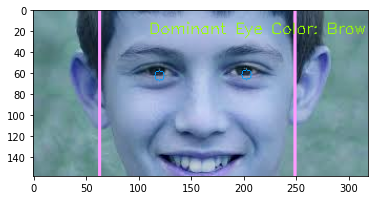

In [10]:
plt.imshow(image)